<a href="https://colab.research.google.com/github/soyJung/UHI-Morphology/blob/main/WPS/Draw_Coastline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LU_Index와 해안선을 그리는 코드

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install netCDF4 xarray cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.8 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# 파일 불러오기
idir = "/content/drive/MyDrive/UHI/"
ifil = "ModVar.nc"
f = xr.open_dataset(idir + ifil)

print(f.data_vars)

Data variables:
    Times      (Time) |S19 19B ...
    CLAT       (Time, south_north, west_east) float32 192kB ...
    CLONG      (Time, south_north, west_east) float32 192kB ...
    LANDMASK   (Time, south_north, west_east) float32 192kB ...
    LU_INDEX   (Time, south_north, west_east) float32 192kB ...
    SOILTEMP   (Time, south_north, west_east) float32 192kB ...
    GREENFRAC  (Time, month, south_north, west_east) float32 2MB ...
    CON        (Time, south_north, west_east) float32 192kB ...
    VAR        (Time, south_north, west_east) float32 192kB ...
    OA1        (Time, south_north, west_east) float32 192kB ...
    OA2        (Time, south_north, west_east) float32 192kB ...
    OA3        (Time, south_north, west_east) float32 192kB ...
    OA4        (Time, south_north, west_east) float32 192kB ...
    OL1        (Time, south_north, west_east) float32 192kB ...
    OL2        (Time, south_north, west_east) float32 192kB ...
    OL3        (Time, south_north, west_east) fl

(219, 219) (219, 219) (219, 219)


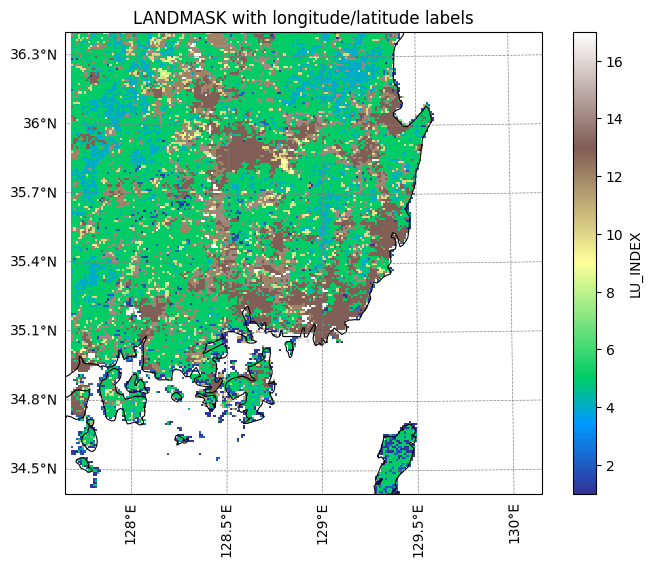

In [ ]:
# 변수 선택
lat = f["CLAT"].isel(Time=0)
lon = f["CLONG"].isel(Time=0)
LM  = f["LU_INDEX"].isel(Time=0)

print(lat.shape, lon.shape, LM.shape)

# --- Lambert Conformal 파라미터 (WRF 계열이면 전역/변수 attrs에 종종 있음)
ref_lat   = 35.40
ref_lon   = 128.90
truelat1  = 30.0
truelat2  = 60.0
stand_lon = 128.90

lambert = ccrs.LambertConformal(
    central_longitude=stand_lon,         # WRF stand_lon
    central_latitude=ref_lat,            # WRF ref_lat
    standard_parallels=(truelat1, truelat2),
)

# --- 그림
fig = plt.figure(figsize=(8,6))
ax  = plt.axes(projection=lambert)

mesh = ax.pcolormesh(
    lon, lat, LM,
    transform=ccrs.PlateCarree(),
    cmap="terrain", shading="nearest"
)
ax.coastlines(resolution="10m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=0.6)
plt.colorbar(mesh, ax=ax, label=str(LM.name))

# 영역 맞춤
ax.set_extent([float(lon.min()), float(lon.max()),
               float(lat.min()), float(lat.max())],
              crs=ccrs.PlateCarree())

# --- 경위도 라벨 표시 ---
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,      # 라벨 표시
    linestyle="--", linewidth=0.5, color="gray"
)

# 원하는 방향만 표시
gl.top_labels    = False   # 위쪽 라벨
gl.bottom_labels = True    # 아래쪽 라벨
gl.left_labels   = True    # 왼쪽 라벨
gl.right_labels  = False   # 오른쪽 라벨

# 라벨을 지도 안에서 바깥으로 빼기
gl.x_inline = False
gl.y_inline = False

gl.xlabel_style = {"size": 10, "color": "black"}
gl.ylabel_style = {"size": 10, "color": "black"}

plt.title("LANDMASK with longitude/latitude labels")
plt.show()